In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catch22 import catch22_all
import scipy.ndimage as ndimage
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import palettable
from pathlib import Path

In [66]:
home = Path('R:/home')
top_dir = Path(home, 'firefly_link/cancer')
data_dir = Path(top_dir, "analysis", "full")
tc_save = Path(top_dir, "analysis", "full", 'tc')
drugs = ['Ibtx','4ap','apamin','chtx']
initial_df1 = pd.read_csv(Path(top_dir, 'analysis', 'correct_dataframes', 'long_acqs_20220617_HPC_labelled_complete.csv'))
initial_df2 = pd.read_csv(Path(top_dir, 'analysis', 'correct_dataframes', 'long_acqs_20220808_HPC_labelled_complete.csv'))
df = pd.concat([initial_df1, initial_df2])
df["exp_stage"] = df.expt + "_" + df.stage
df['exp_stage'].unique()

df['expt'].unique()

array(['4ap', 'Ibtx', 'apamin', 'chtx', 'dmso', 'wm'], dtype=object)

In [67]:
lines = df.expt.unique()[:-2]
csv_filenames = []
for line in lines:
    csv_filenames.append(str(Path(tc_save, f'{line}_pre_active_tcs_filt.csv')))
    csv_filenames.append(str(Path(tc_save, f'{line}_post_active_tcs_filt.csv')))
    tcs = pd.concat((pd.read_csv(f,index_col = [0]) for f in csv_filenames))
    tcs.index = np.arange(tcs.shape[0])
    #print(tcs)

KeyboardInterrupt: 

In [69]:
lines = ['chtx']
csv_filenames = []
for line in lines:
    csv_filenames.append(str(Path(tc_save, f'{line}_pre_active_tcs_filt.csv')))
    csv_filenames.append(str(Path(tc_save, f'{line}_post_active_tcs_filt.csv')))
    tcs = pd.concat((pd.read_csv(f,index_col = [0]) for f in csv_filenames))
    tcs.index = np.arange(tcs.shape[0])
    #print(tcs)
tcs

,exp_stage,trial,cell,0,1,2,3,4,5,6,...,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998
0,chtx_pre,cancer_20220714_slip1_area1_long_acq_cancer202...,cancer_20220714_slip1_area1_long_acq_cancer202...,0.999908,1.000250,1.000835,1.001495,1.002046,1.002349,1.002359,...,0.996527,0.996918,0.997167,0.997252,0.997216,0.997138,0.997079,0.997064,0.997079,0.997097
1,chtx_pre,cancer_20220714_slip1_area1_long_acq_cancer202...,cancer_20220714_slip1_area1_long_acq_cancer202...,1.004381,1.004324,1.004215,1.004072,1.003913,1.003751,1.003581,...,0.997210,0.997174,0.997272,0.997503,0.997849,0.998276,0.998737,0.999168,0.999503,0.999687
2,chtx_pre,cancer_20220714_slip1_area1_long_acq_cancer202...,cancer_20220714_slip1_area1_long_acq_cancer202...,1.001507,1.001376,1.001115,1.000725,1.000230,0.999684,0.999174,...,0.995700,0.995984,0.996242,0.996485,0.996746,0.997064,0.997447,0.997856,0.998210,0.998417
3,chtx_pre,cancer_20220714_slip1_area1_long_acq_cancer202...,cancer_20220714_slip1_area1_long_acq_cancer202...,1.000443,1.000437,1.000421,1.000390,1.000343,1.000290,1.000267,...,1.000229,1.000280,1.000196,0.999949,0.999564,0.999113,0.998685,0.998348,0.998132,0.998030
4,chtx_pre,cancer_20220714_slip1_area1_long_acq_cancer202...,cancer_20220714_slip1_area1_long_acq_cancer202...,1.003797,1.003481,1.002933,1.002290,1.001693,1.001242,1.000977,...,1.002071,1.001996,1.001850,1.001665,1.001474,1.001296,1.001140,1.001009,1.000908,1.000853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,chtx_post,cancer_20220715_slip2_area4_long_acq_cancer202...,cancer_20220715_slip2_area4_long_acq_cancer202...,1.004262,1.004099,1.003816,1.003495,1.003224,1.003066,1.003022,...,1.001872,1.001939,1.001872,1.001668,1.001335,1.000897,1.000409,0.999945,0.999585,0.999388
220,chtx_post,cancer_20220715_slip2_area4_long_acq_cancer202...,cancer_20220715_slip2_area4_long_acq_cancer202...,1.002797,1.003017,1.003395,1.003832,1.004233,1.004537,1.004739,...,0.997061,0.997409,0.997757,0.998047,0.998232,0.998295,0.998259,0.998168,0.998074,0.998017
221,chtx_post,cancer_20220715_slip2_area4_long_acq_cancer202...,cancer_20220715_slip2_area4_long_acq_cancer202...,1.002072,1.001893,1.001594,1.001257,1.000940,1.000661,1.000408,...,1.001831,1.001617,1.001172,1.000604,1.000073,0.999732,0.999652,0.999795,1.000032,1.000203
222,chtx_post,cancer_20220715_slip2_area4_long_acq_cancer202...,cancer_20220715_slip2_area4_long_acq_cancer202...,1.002464,1.002288,1.001941,1.001461,1.000938,1.000497,1.000257,...,0.999347,0.998967,0.998741,0.998696,0.998808,0.999022,0.999272,0.999499,0.999664,0.999750


In [70]:
#Feature Extraction
features=[]
for i in range(tcs.shape[0]):
    df=tcs.iloc[i,3:]
    #Feature Extraction
    catch22_out=catch22_all(df)['values']
    features.append(catch22_out)
#values=features['values'].apply(pd.Series)
features = pd.DataFrame(features)
features.columns=['DN_HistogramMode_5','DN_HistogramMode_10','CO_f1ecac','CO_FirstMin_ac','CO_HistogramAMI_even_2_5','CO_trev_1_num','MD_hrv_classic_pnn40','SB_BinaryStats_mean_longstretch1','SB_TransitionMatrix_3ac_sumdiagcov','PD_PeriodicityWang_th0_01','CO_Embed2_Dist_tau_d_expfit_meandiff','IN_AutoMutualInfoStats_40_gaussian_fmmi','FC_LocalSimple_mean1_tauresrat','DN_OutlierInclude_p_001_mdrmd','DN_OutlierInclude_n_001_mdrmd','SP_Summaries_welch_rect_area_5_1','SB_BinaryStats_diff_longstretch0','SB_MotifThree_quantile_hh','SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1','SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1','SP_Summaries_welch_rect_centroid','FC_LocalSimple_mean3_stderr']
features

,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,...,FC_LocalSimple_mean1_tauresrat,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr
0,0.357912,0.042342,81,248,0.780797,4.773191e-05,0.692277,213.0,0.006937,553,...,0.031847,-0.550710,-0.451990,0.998601,26.0,1.355230,0.795918,0.734694,0.013806,0.186794
1,-0.253353,0.055653,67,107,0.787422,-1.291366e-04,0.715686,302.0,0.004630,164,...,0.025000,-0.280056,-0.406881,0.997941,31.0,1.348065,0.183673,0.775510,0.014573,0.211137
2,-1.039706,-0.444432,20,63,0.459068,-9.206445e-04,0.721689,184.0,0.003212,72,...,0.050847,0.078416,-0.043609,0.998194,25.0,1.375519,0.346939,0.571429,0.049854,0.240886
3,0.350615,-0.025830,62,207,0.621164,1.809409e-04,0.763705,192.0,0.009116,520,...,0.029940,-0.345969,-0.623125,0.997139,33.0,1.418689,0.163265,0.673469,0.016874,0.256372
4,0.082637,0.370438,63,95,0.765355,-4.697169e-05,0.673669,234.0,0.032922,108,...,0.018315,-0.035607,-0.914383,0.998392,23.0,1.379156,0.244898,0.755102,0.016874,0.199874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.233899,-0.597529,162,398,0.906826,-2.265873e-05,0.631853,388.0,0.004167,943,...,0.020408,0.009102,0.383677,0.998454,25.0,1.312059,0.857143,0.775510,0.006136,0.160473
220,-0.758137,-0.045747,65,36,0.593239,9.986257e-05,0.798719,198.0,0.009838,131,...,0.024390,-0.710542,0.085617,0.995944,29.0,1.437839,0.163265,0.693878,0.019942,0.295780
221,-0.459591,-0.107485,106,378,0.734280,9.773226e-07,0.599440,385.0,0.014463,994,...,0.022422,-0.231446,-0.520904,0.998869,42.0,1.329514,0.795918,0.795918,0.009971,0.150448
222,-0.477148,-0.114400,133,36,0.648694,-2.175079e-04,0.764706,344.0,0.006464,234,...,0.019763,0.105621,0.312262,0.997306,27.0,1.396115,0.142857,0.795918,0.007670,0.239834


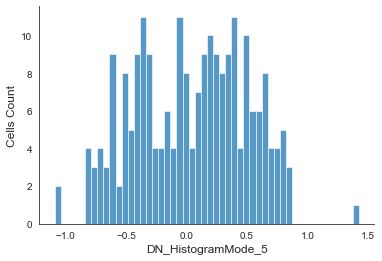

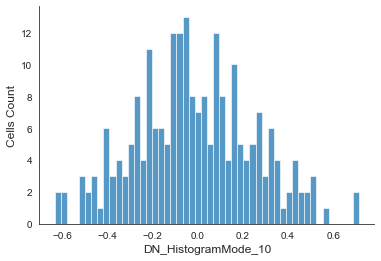

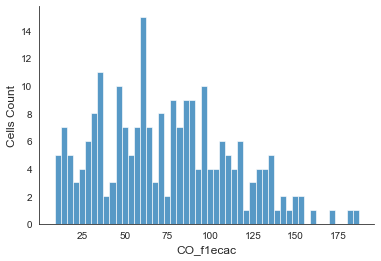

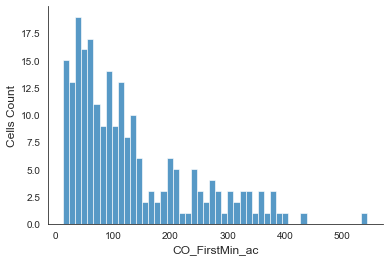

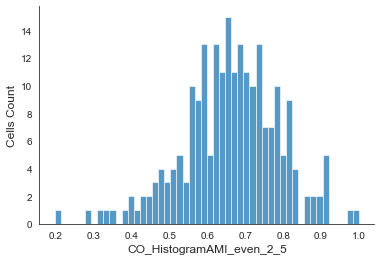

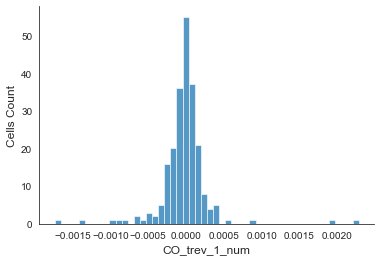

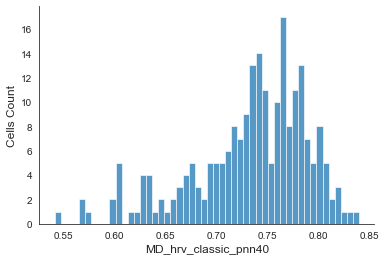

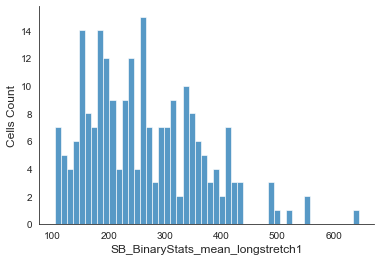

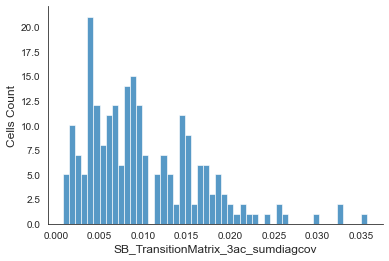

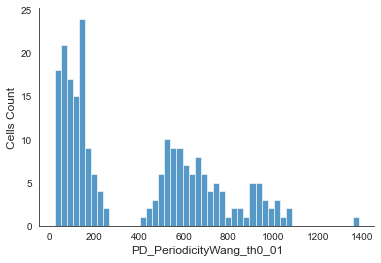

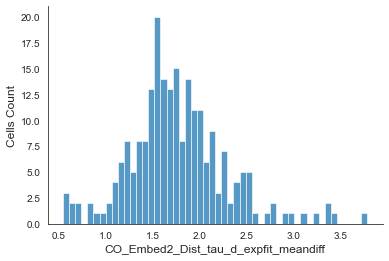

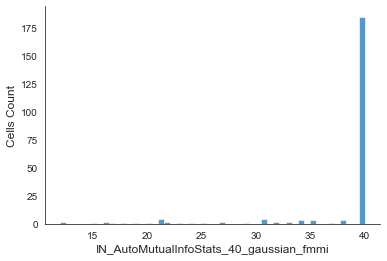

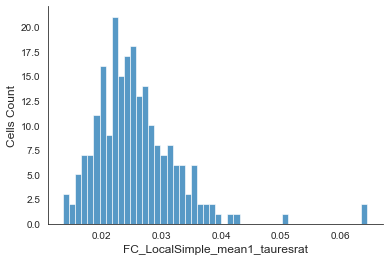

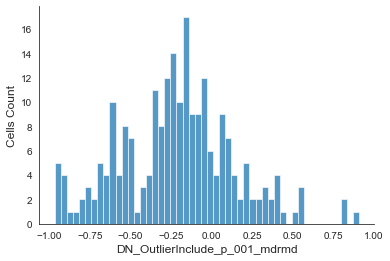

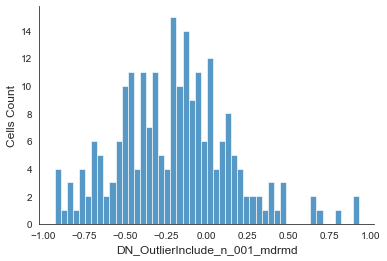

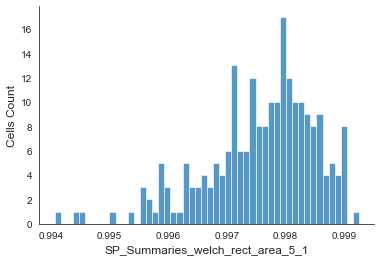

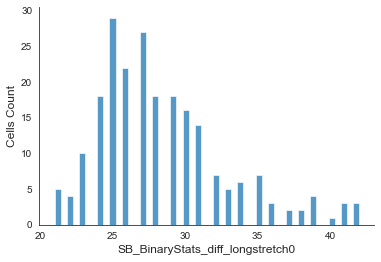

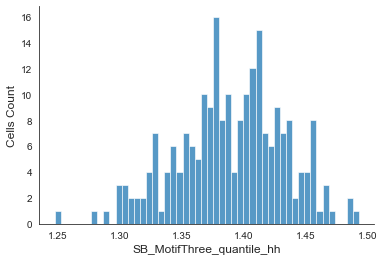

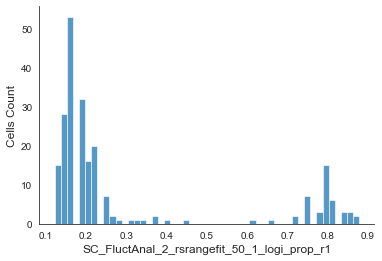

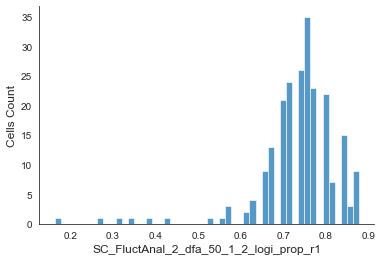

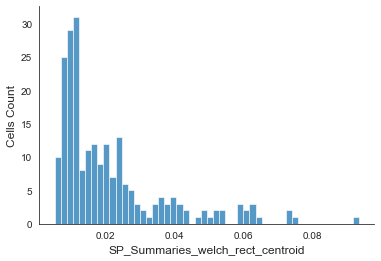

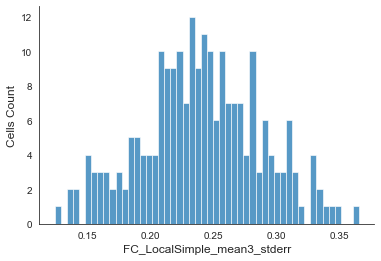

In [71]:
#Raw data distribution
values = features
for i in range(values.shape[1]):
    #plt.figure(dpi=300)
    sns.histplot(values.iloc[:,i],bins=50)
    sns.despine(top=True, right=True, left=False, bottom=False)
    sns.set_style('white')
    #plt.title(values.columns[i])
    plt.xlabel(values.columns[i],fontsize=12)
    plt.ylabel('Cells Count',fontsize=12)
    plt.show()

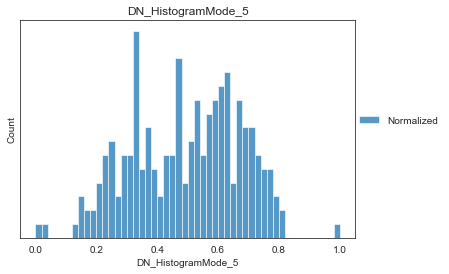

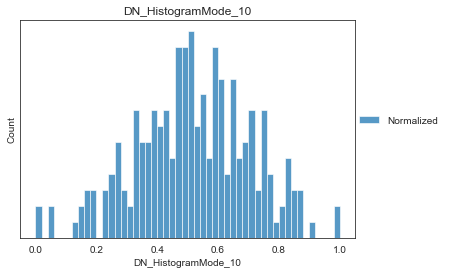

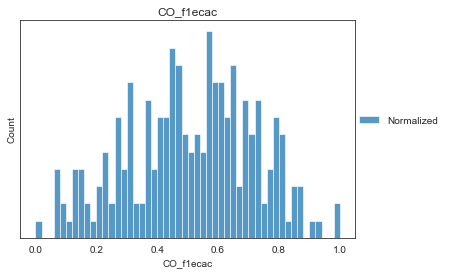

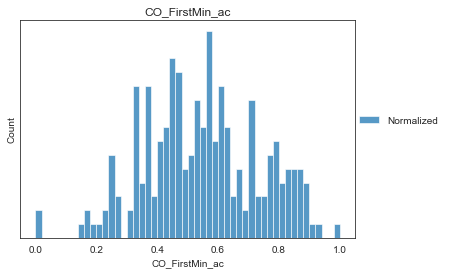

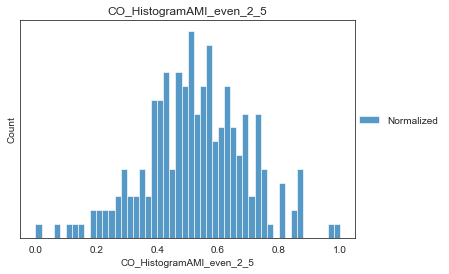

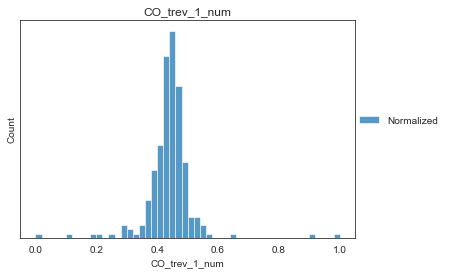

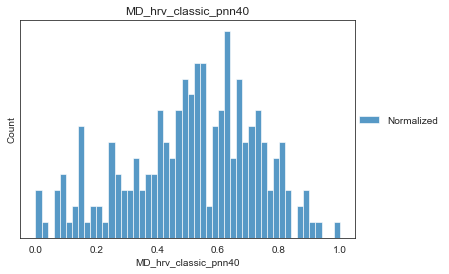

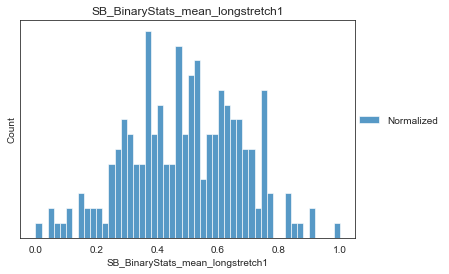

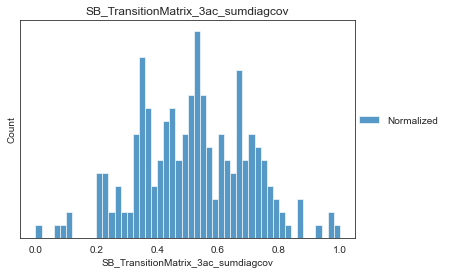

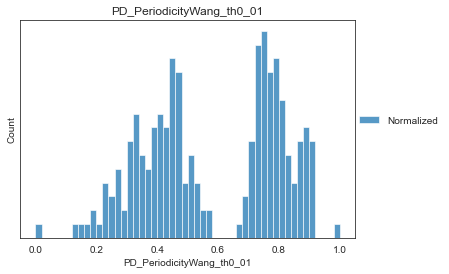

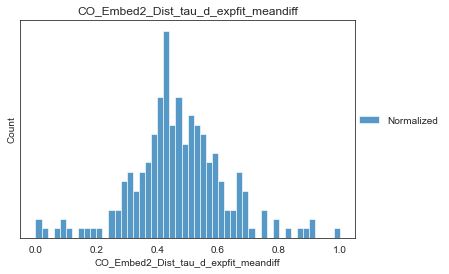

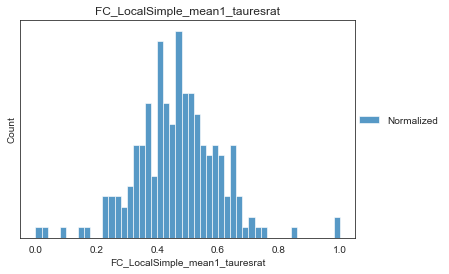

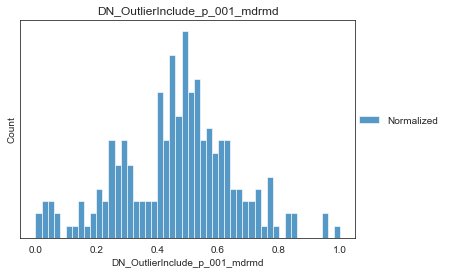

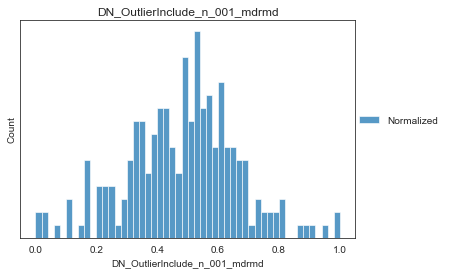

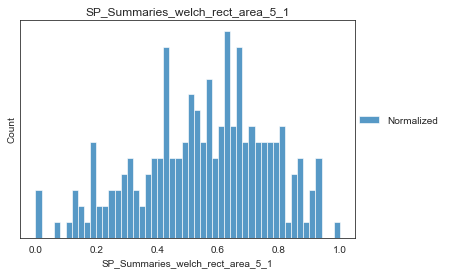

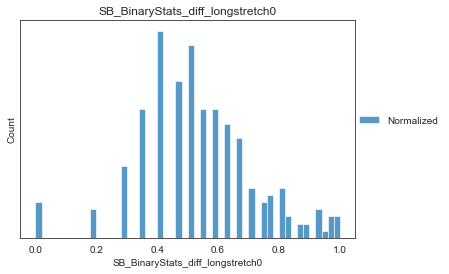

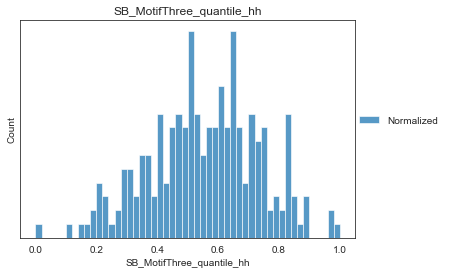

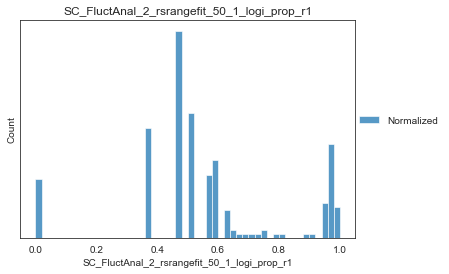

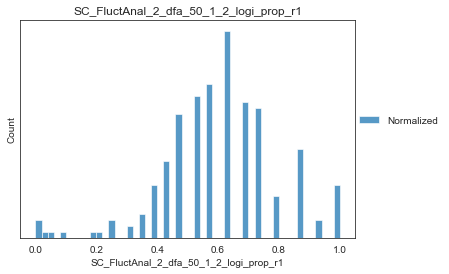

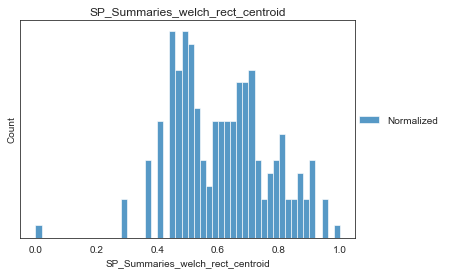

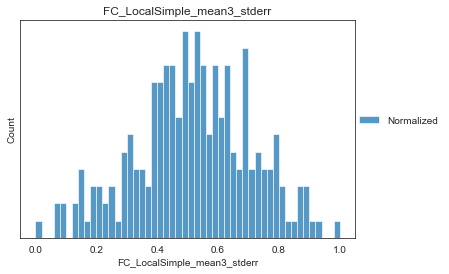

In [72]:
#Remove the least informative one    
f=values
f=f.drop(['IN_AutoMutualInfoStats_40_gaussian_fmmi'],axis=1)

#Normalization: Scale[0.0001,1]+Boxcox+Scale[0,1] and check the normalized distribution
import scipy.stats as spstats
min_max_scaler = MinMaxScaler(feature_range=(0.0001,1))
fb = min_max_scaler.fit_transform(f)
fb=pd.DataFrame(fb)

for i in range(f.shape[1]):
    feature=np.array(fb.iloc[:,i])
    l,opt_lambda=spstats.boxcox(feature)
    #print('Optimal lambda value:', opt_lambda)
    f.iloc[:,i]=spstats.boxcox(fb.iloc[:,i],lmbda=opt_lambda)

fb= MinMaxScaler(feature_range=(0,1)).fit_transform(f)
fb= pd.DataFrame(fb)
fb.columns=[x for x in values.columns if x != 'IN_AutoMutualInfoStats_40_gaussian_fmmi']

for i in range(fb.shape[1]):
    #plt.figure(dpi=600)
    #sns.kdeplot(f.iloc[:,i],label='Original')
    sns.histplot(fb.iloc[:,i],label='Normalized',bins=50)
    #sns.despine(top=True, right=True, left=False, bottom=False)
    sns.set_style('white')
    #plt.xticks([])
    plt.yticks([])
    plt.title(fb.columns[i])
    #plt.ylabel('Number')
    #plt.xlabel(fb.columns[i])
    #plt.savefig(fb.columns[i])
    plt.legend(loc=[1,0.5],frameon=False)
    plt.show()

In [73]:
#Try without deleting any traces
good_tcs = tcs
good_fb = fb
good_tcs.index = np.arange(tcs.shape[0])
good_fb.index = np.arange(fb.shape[0])


# Estimate k using Silhouette Coefficient - Intercluster similarity
# Comparing Hierarchical and GMM
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture as GMM
Scores = []  
g=[]
for k in range(2,9):
    estimator = AgglomerativeClustering(n_clusters=k,linkage='ward')  # 构造聚类器
    estimator.fit(good_fb)
    Scores.append(silhouette_score(good_fb,estimator.labels_,metric='euclidean'))
    estimator_g = GMM(n_components=k, random_state=0)
    estimator_g.fit(good_fb)
    g.append(silhouette_score(good_fb,estimator_g.predict(good_fb),metric='euclidean'))

X = range(2,9)
plt.figure(dpi=300,facecolor='white')
#plt.figure()
plt.xlabel('Clusters',fontsize=20)
plt.ylabel('Silhouette Coefficient',fontsize=20)
plt.plot(X,Scores,'o-',label='Hierarchical')
plt.plot(X,g,'o-',label='GMM')
#plt.title('Silhoutte')
plt.legend(fontsize=16,frameon=False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
#plt.axes().yaxis.set_tick_params(which='major', left = 'off')
#plt.axes().xaxis.set_tick_params(which='major', bottom = 'off')
#plt.savefig('silhouette coef.pdf',format='pdf',bbox_inches='tight',dpi=300)
plt.show()

In [74]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=3)
new_tsne = pd.DataFrame(tsne.fit_transform(good_fb))

([], [])

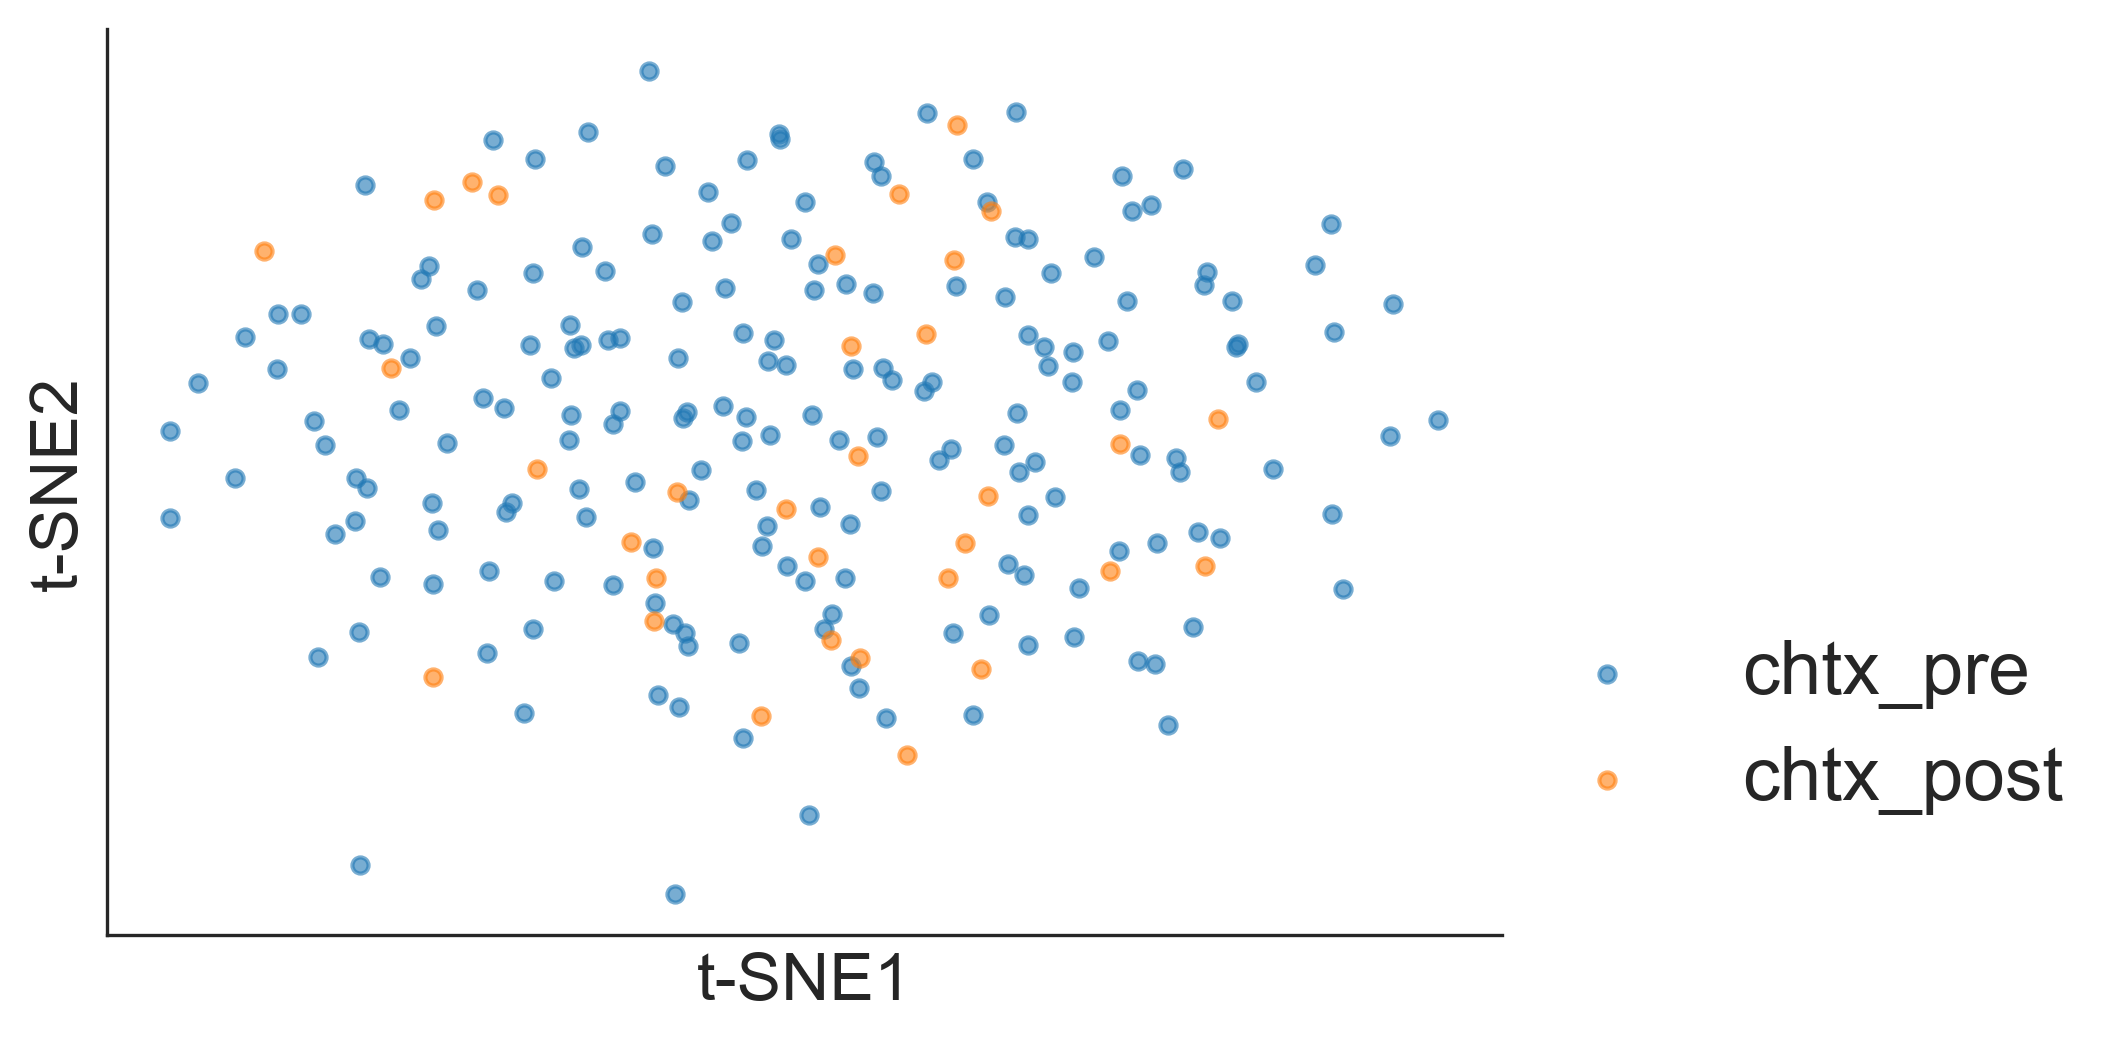

In [75]:
fig=plt.figure(dpi=300)
ax=fig.add_subplot(111)
#color=['lightcoral','indianred','brown','maroon']

for l in tcs.exp_stage.unique():
    t = new_tsne[good_tcs['exp_stage'] == l]
    ax.scatter(t.iloc[:,0],t.iloc[:,1], label = l, marker = 'o',s = 15,alpha = 0.6)
#ax.set_xlim([-1.5,1.5])
#ax.set_ylim([-0.75,1.25])
plt.xlabel(r't-SNE1',fontsize=16)  
plt.ylabel(r't-SNE2',fontsize=16)
plt.legend(fontsize=18,frameon=False,loc=[1,0.1])
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks([])
plt.yticks([])
#plt.savefig('combine tsne space.eps',format='eps',dpi=600)
#plt.savefig('combine tsne space.png',dpi=600)

In [76]:
pca = PCA(n_components=0.8)
new_pca = pd.DataFrame(pca.fit_transform(good_fb))
importance = pca.explained_variance_ratio_
c=pca.components_

([], [])

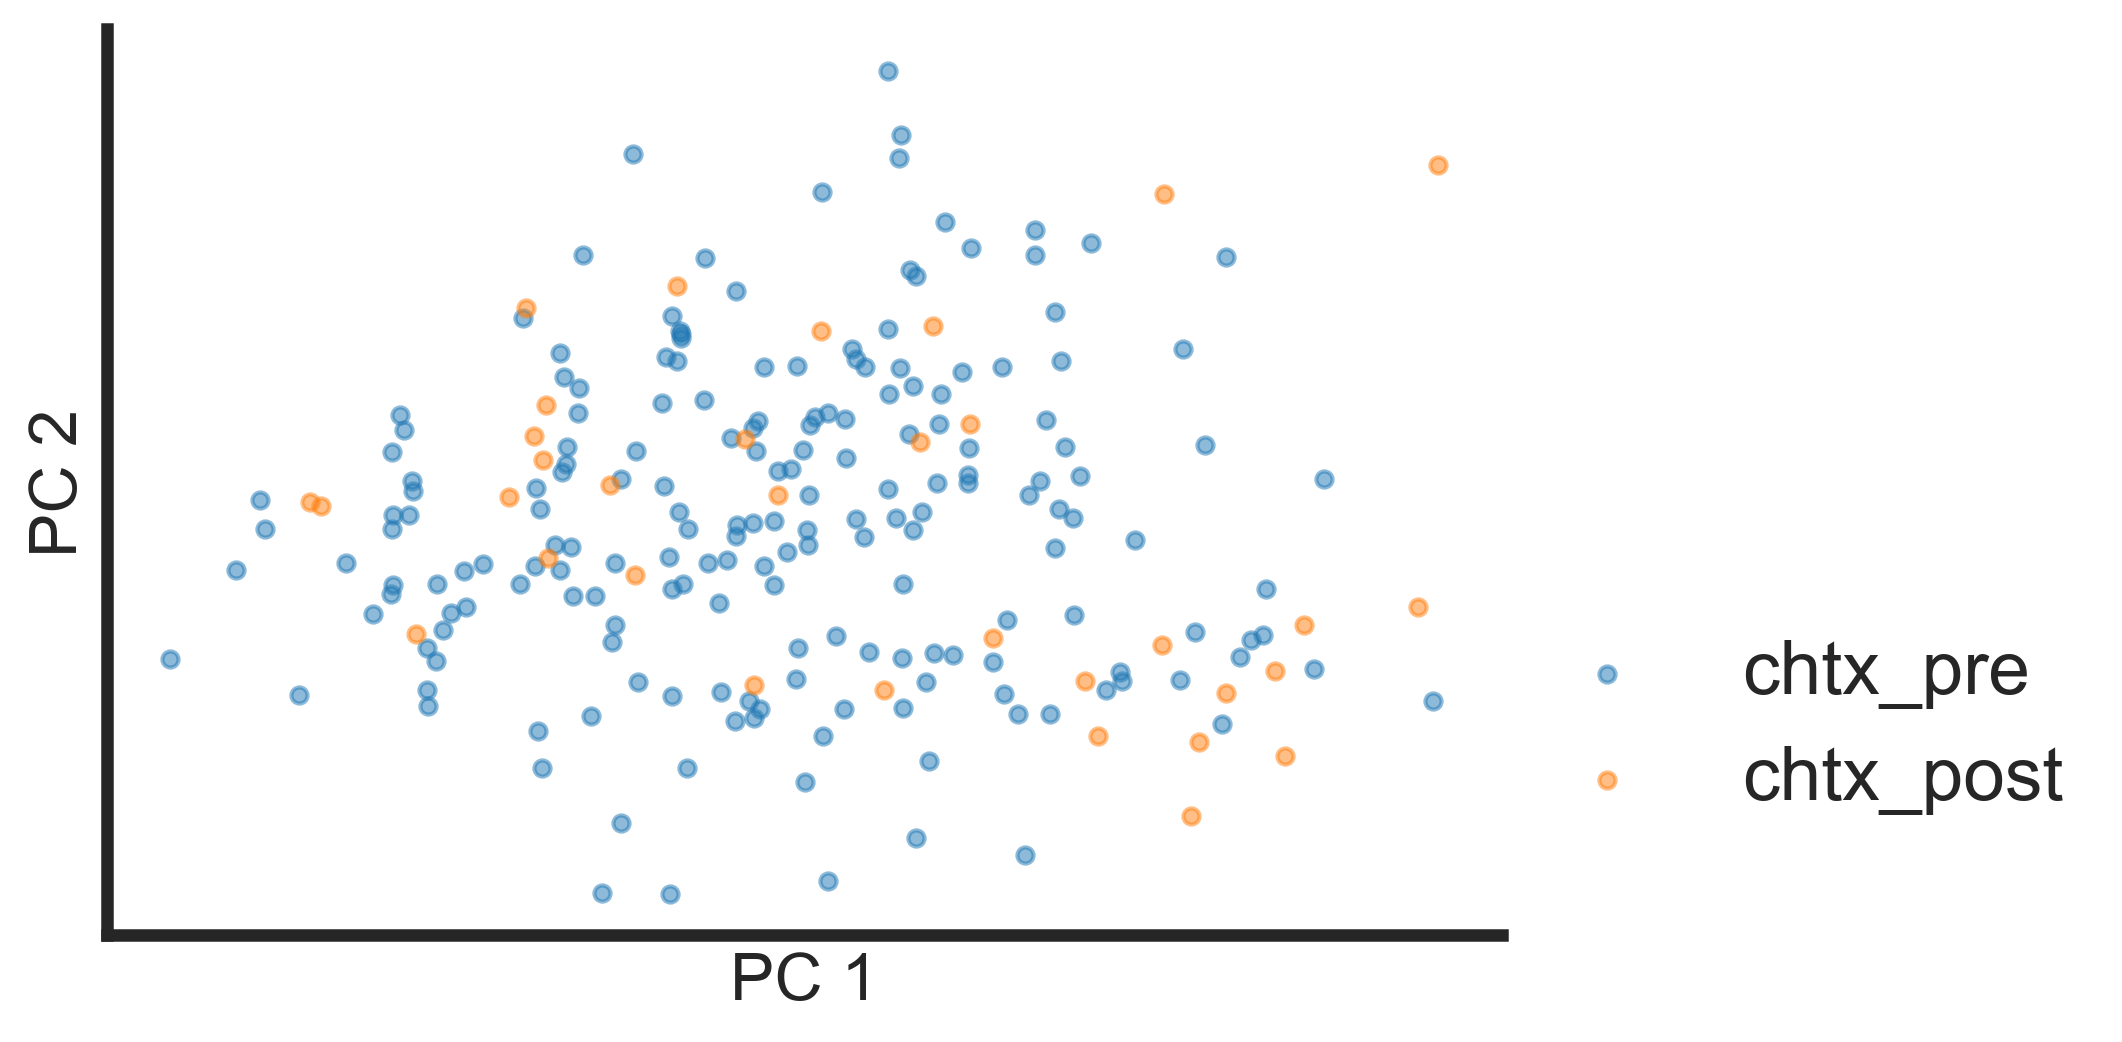

In [77]:
fig=plt.figure(dpi=300)
ax=fig.add_subplot(111)
#color=['lightcoral','indianred','brown','maroon']

for l in tcs.exp_stage.unique():
    t = new_pca[good_tcs['exp_stage'] == l]
    ax.scatter(t.iloc[:,0],t.iloc[:,1], label = l, marker = 'o',s = 15,alpha = 0.5)
#ax.set_xlim([-1.5,1.5])
#ax.set_ylim([-0.75,1.25])
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
kwargs={'linestyle':'-', 'lw':0.1, 'width':0.02} 
#for i in np.arange(c.shape[1]):
    #ax.arrow(0+1.5,0-1,c[0,i],c[1,i],alpha=0.5,ec='black',fc='black', **kwargs)
    #ax.text(c[0,i]+1.5,c[1,i]-1.1,f'{i+1}', ha="center", va="center",fontsize=14)
plt.xlabel(r'PC 1',fontsize=16)  
plt.ylabel(r'PC 2',fontsize=16)
plt.legend(fontsize=18,frameon=False,loc=[1,0.1])
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks([])
plt.yticks([])
#plt.savefig('combine tsne space.eps',format='eps',dpi=600)
#plt.savefig('combine tsne space.png',dpi=600)

In [78]:
import umap
reducer = umap.UMAP(random_state=42,n_components=3)
new_umap = pd.DataFrame(reducer.fit_transform(good_fb))

([], [])

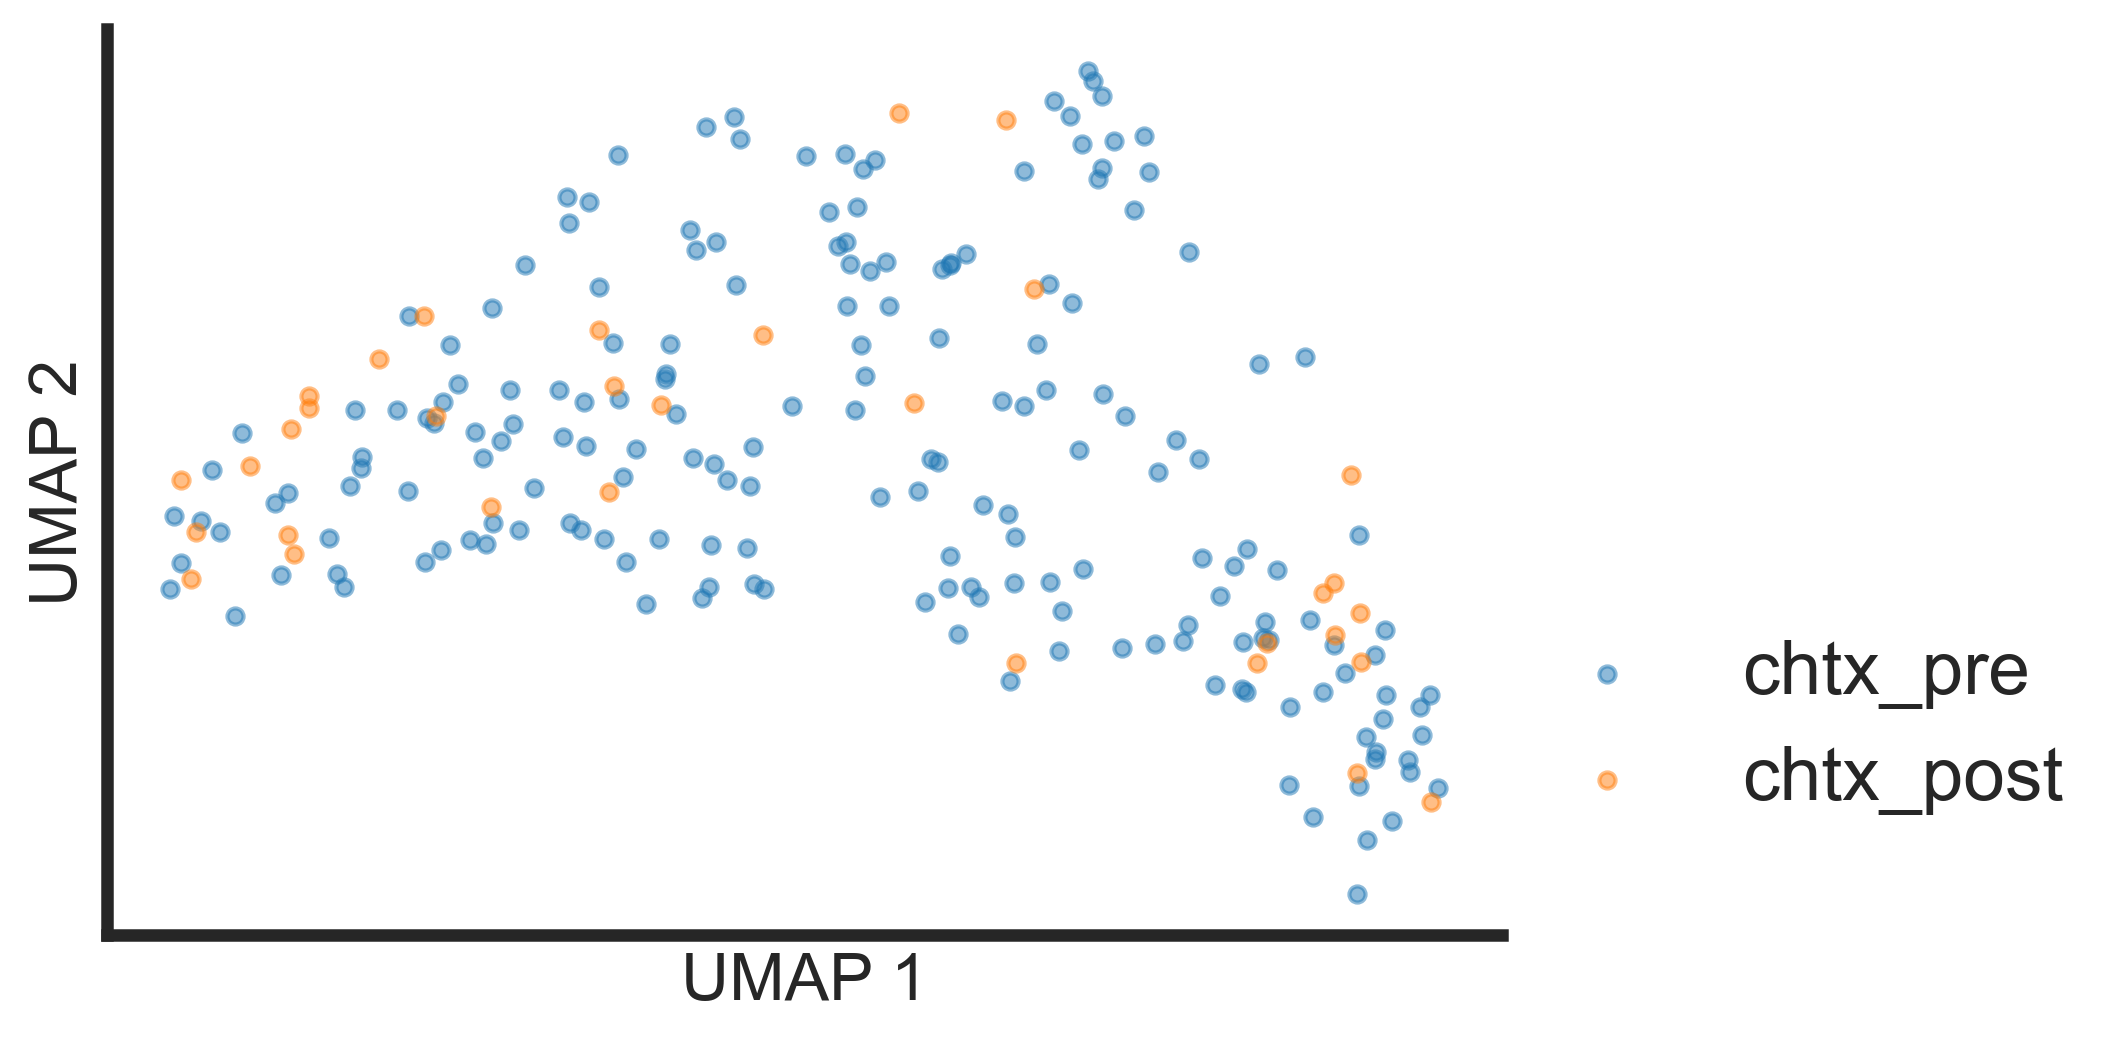

In [79]:
fig=plt.figure(dpi=300)
ax=fig.add_subplot(111)
#color=['lightcoral','indianred','brown','maroon']

for l in tcs.exp_stage.unique():
    t = new_umap[good_tcs['exp_stage'] == l]
    ax.scatter(t.iloc[:,0],t.iloc[:,1], label = l, marker = 'o',s = 15,alpha = 0.5)
#ax.set_xlim([-1.5,1.5])
#ax.set_ylim([-0.75,1.25])
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
plt.xlabel(r'UMAP 1',fontsize=16)  
plt.ylabel(r'UMAP 2',fontsize=16)
plt.legend(fontsize=18,frameon=False,loc=[1,0.1])
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks([])
plt.yticks([])
#plt.savefig('combine tsne space.eps',format='eps',dpi=600)
#plt.savefig('combine tsne space.png',dpi=600)